<a id='section-zero'></a>

# Floresta Aleatória (*Random Forest*)

**Objetivos**: Aprender o que é Floresta Aleatória usando a biblioteca `Scikit-Learn`.

## O que é Floresta Aleatória?

Uma Floresta Aleatória é um algoritmo que constrói uma infinidade de Árvores de Decisão aleatórias e usa a previsão das árvores individuais para computar uma previsão geral do conjunto de árvores.

## Comitê (*Ensemble*)

* Cada **Árvore de Decisão Individual** faz um “voto” pela previsão e é utilizado a previsão que tem a **maioria** dos “votos”.
* Essa classe de algoritmos são chamadas de **comitê** (do inglês *ensemble*).
* Essa lógica se dá pela **sabedoria da multidão** (*wisdom of the crowd*):
    * Um grande número de modelos (árvores) relativamente não correlacionados que operam como um comitê **superará** qualquer um dos modelos constituintes individuais
    
<img src="images/florestas-aleatorias.jpg" alt="arvore-decisao" width="300"/>

## Classificação e Regressão

* Classificação: [`sklearn.ensemble.RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* Regressão: [`sklearn.ensemble.RandomForestRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

## Hiperparâmetros

* **Número de Árvores da Floresta**
* **~Processamento em Paralelo~**
* **Todos das Árvores de Decisão**:
    * **Profundidade Máxima das Árvores**: Número máximo de nós que devem existir em uma dada árvore
    * **Quantidade Mínima de Observações para uma Decisão**: Mínimo de observações que um nó deve ter para ser separado

## Exemplo com o Dataset Titanic

Contém 891 passageiros reais do Titanic que afundou em 15/04/1912 matando 1502 de 2224 passageiros e tripulação que estavam a bordo.

* `survived`: *dummy* `0` ou `1` 
* `pclass`: Classe do Passageiro
    - `1`: Primeira Classe
    - `2`: Segunda Classe
    - `3`: Terceira Classe
* `sex`: Sexo `male` ou `female`
* `age`: Idade
* `sibsp`: Número de Irmãos (*Siblings*) e Esposas (*spouse*) a bordo
* `parch`: Número de pais/filhos a bordo
* `fare`: Valor pago pela passagem em libras
* `embarked`: Porto que embarcou
    - `C`: Cherbourg
    - `Q`: Queenstown
    - `S`: Southampton)
* `class`: Mesmo que `pclass` só que em texto
* `adult_male`: *dummy* para `age > 16` e `sex == 'male'`
* `deck`: Qual deck a cabine do passageiro se situava
* `alive`: Mesmo que survived só que com `yes` ou `no`
* `alone`: *dummy* para se viajava sozinho

<img src="images/titanic.png" alt="titanic" style="width: 500px;"/>

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.dropna(subset=feature_names, inplace=True)  #891 para 714

X = titanic[feature_names].to_numpy()
y = titanic['survived'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123)

### Floresta Aleatória de Classificação
Usar a classe do Scikit-Learn [`sklearn.ensemble.RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

#### Argumentos:
* `n_estimators` - `int` - Número de Árvores da Floresta
    * `100` - padrão
* `n_jobs` - `int` - Número de threads de processamento que sera utilizado em paralelo
    * `None` - padrão
    * `-1` - usa todos os threads
* Todos da Árvore de Classificação
    * `criterion` - `str` - Critério de Impureza (Gini ou Entropia)
        * `'gini'` - padrão
        * `'entropy'`
    * `max_depth` - `int` - Profundidade Máxima da Árvore
    * `min_samples_split` - `int` ou `float` - padrão `2` - Quantidade Mínima de Observações para uma Decisão
    * `min_samples_leaf` - `int` ou `float` - Quantidade Mínima de Observações para que um Nó vire Folha (não tenha mais outros nós abaixo)
    * `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

#### Retorna:
* Objeto `estimator` do Scikit-Learn

### Floresta Aleatória de Regressão
Usar a classe do Scikit-Learn [`sklearn.ensemble.RandomForestRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

#### Argumentos:
* `n_estimators` - `int` - Número de Árvores da Floresta
    * `100` - padrão
* `n_jobs` - `int` - Número de threads de processamento que sera utilizado em paralelo
    * `None` - padrão
    * `-1` - usa todos os threads
* Todos da Árvore de Regressão
    * `criterion` - `str` - Critério de Impureza (MSE ou MAE)
        * `'mse'` - padrão
        * `'mae'`
    * `max_depth` - `int` - Profundidade Máxima da Árvore
    * `min_samples_split` - `int` ou `float` - padrão `2` - Quantidade Mínima de Observações para uma Decisão
    * `min_samples_leaf` - `int` ou `float` - Quantidade Mínima de Observações para que um Nó vire Folha (não tenha mais outros nós abaixo)
    * `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

#### Retorna:
* Objeto `estimator` do Scikit-Learn

In [2]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500,
                             max_depth=5,
                             random_state=123,
                             n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1,
                       random_state=123)

### Acurácia do Modelo
Usar a função do Scikit-Learn [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

Retorna um score de acurácia `float` entre $0$ e $1$

#### Argumentos
* `y_true`: Classes Verdadeiras
    * 2 classes: vetor (1-D)
    * Mais que 2 classes: matriz (2-D)
* `y_pred`: Classes Previstas pelo Modelo
    * 2 classes: vetor (1-D)
    * Mais que 2 classes: matriz (2-D)
    
> Obs: Regressão Logística acurácias: 0.69 Treino e 0.7 Teste

> Obs: *Support Vector Machines* acurácias: 0.79 Treino e 0.75 Teste

> Obs: Árvores de Decisão acurácias: 0.79 Treino e 0.79 Teste

In [3]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.87

 ---------------------------

Acurácia de Teste: 0.83


### Plotando a Árvore

Usar a função do Scikit-Learn [`sklearn.tree.plot_tree()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html). Usar junto com o `matplotlib.pyplot`.

Porém há um detalhe:
* Random Forests não retorna uma única árvore, mas uma lista de árvores
* Elas estão localizadas em `clf.estimators_[X]`

Lembrando nossos features

* `X[0]` = `'pclass'`
* `X[1]` = `'female'`
* `X[2]` = `'age'`
* `X[3]` = `'fare'`

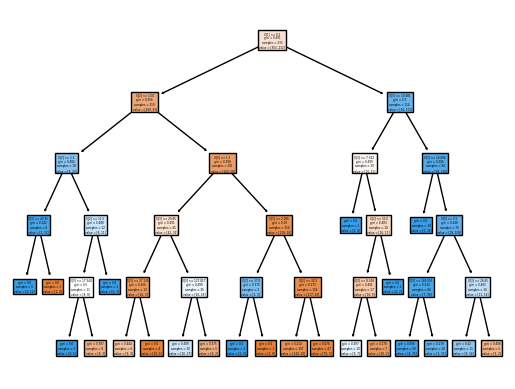

In [4]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure()
plot_tree(clf.estimators_[499], filled=True)
plt.show()

## Atividade - Floresta Aleatória com o dataset [Iris](https://scikit-learn.org/stable/datasets/index.html#iris-dataset)

Edgar Anderson coletou os dados para quantificar a variação morfológica das flores de íris de três espécies relacionadas.

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris (Setosa, Virginica e Versicolor). Quatro características foram medidas em cada amostra (cm):

* $N = 150$
* Atributos: 10
    * `sepal length (cm)` - Cumprimento da Sépala
    * `sepal width (cm)` - Largura da Sépala
    * `petal length (cm)` - Cumprimento da Pétala
    * `petal width (cm)` - Largua da Sépala
* Variável dependente: Tipo de espécie de Iris
    * `0` - Setosa
    * `1` - Virginica
    * `2` - Versicolor 

* Achar a acurácia do modelo nos dados de teste

>Obs: usar `test_size = 0.25` e `random_state = 123`

<img src="images/iris-species.png" alt="iris-sepals-petals" style="width: 600px;"/>

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

In [6]:
print('Nomes dos Atributos: ', iris['feature_names'], '\n')
print('Tamanho de X: ', X.shape, '\n')
print('Tamanho de y: ', y.shape, '\n')

Nomes dos Atributos:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

Tamanho de X:  (150, 4) 

Tamanho de y:  (150,) 



In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [8]:
print('Tamanho de X_train: ', X_train.shape, '\n')
print('Tamanho de X_test: ', X_test.shape, '\n')
print('Tamanho de y_train: ', y_train.shape, '\n')
print('Tamanho de y_test: ', y_test.shape, '\n')

Tamanho de X_train:  (112, 4) 

Tamanho de X_test:  (38, 4) 

Tamanho de y_train:  (112,) 

Tamanho de y_test:  (38,) 

